In [71]:
from keras.preprocessing.image import ImageDataGenerator
import os

main_dir = '..\\dataset'

train_dir = os.path.join(main_dir, 'train')
test_dir = os.path.join(main_dir, 'test')
val_dir = os.path.join(main_dir, 'val')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 18

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(100, 100), color_mode= 'grayscale', batch_size=batch_size, class_mode='categorical')
test_gen = test_datagen.flow_from_directory(test_dir, target_size=(100, 100), color_mode= 'grayscale', batch_size=batch_size, class_mode='categorical')
val_gen = val_datagen.flow_from_directory(val_dir, target_size=(100, 100), color_mode= 'grayscale', batch_size=batch_size, class_mode='categorical')

Found 1929 images belonging to 10 classes.
Found 287 images belonging to 10 classes.
Found 548 images belonging to 10 classes.


In [72]:
for data_batch, label_batch in train_gen:
    print('Data batch shape:', data_batch.shape)
    print('Label batch shape:', label_batch.shape)
    break

Data batch shape: (18, 100, 100, 1)
Label batch shape: (18, 10)


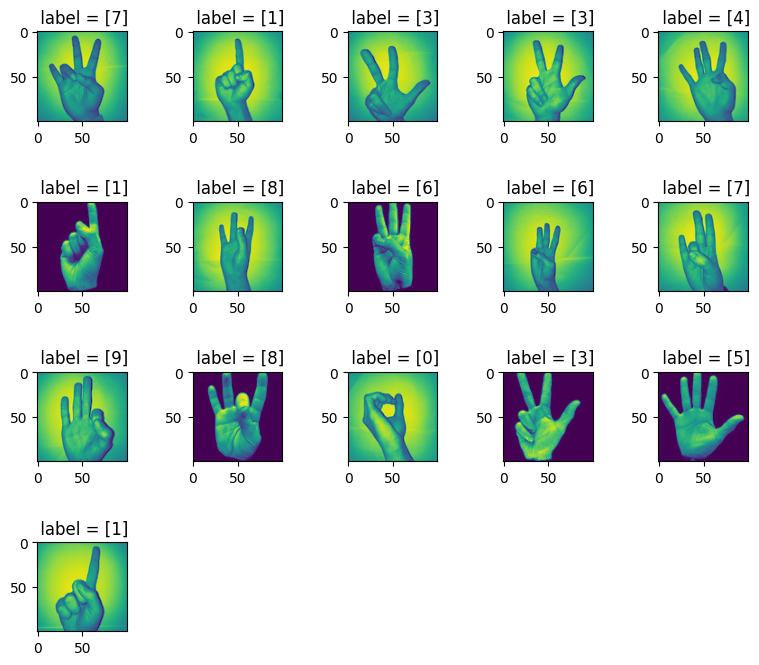

In [73]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 10))
columns = 5
rows = 5
for i in range(1, 17):
    img = data_batch[i]
    ax = fig.add_subplot(rows, columns, i)
    plt.subplots_adjust(hspace=0.9, wspace=0.01)
    label = np.where(label_batch[i] == 1)
    ax.title.set_text(" label = " + str(label[0]))
    plt.imshow(img)
plt.show()

In [74]:
# Batch parameters

train_filenames = train_gen.filenames
train_count = len(train_filenames)

val_filenames = val_gen.filenames
val_count = len(val_filenames)

test_filenames = test_gen.filenames
test_count = len(test_filenames)

train_spe =  int(train_count / batch_size)
val_spe = int(val_count / batch_size)
test_spe = int(test_count / batch_size)

In [75]:
from keras import models, layers

network = models.Sequential()

network.add(layers.Conv2D(32, (4,4), activation='relu', input_shape=(100, 100, 1)))
network.add(layers.MaxPool2D((1,1)))
network.add(layers.Flatten())
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 97, 97, 32)        544       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 97, 97, 32)       0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 301088)            0         
                                                                 
 dense_28 (Dense)            (None, 128)               38539392  
                                                                 
 dense_29 (Dense)            (None, 10)                1290      
                                                                 
Total params: 38,541,226
Trainable params: 38,541,226
Non-trainable params: 0
_________________________________________

In [76]:
from keras import optimizers

network.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(), metrics=['accuracy'])

history = network.fit(train_gen,
                      steps_per_epoch=train_spe,
                      epochs=9,
                      validation_data=val_gen,
                      validation_steps=val_spe)

Epoch 1/9
107/107 [==============================] - 40s 361ms/step - loss: 5.7113 - accuracy: 0.2972 - val_loss: 1.3407 - val_accuracy: 0.5389
Epoch 2/9
107/107 [==============================] - 38s 358ms/step - loss: 0.8591 - accuracy: 0.7200 - val_loss: 0.8460 - val_accuracy: 0.7222
Epoch 3/9
107/107 [==============================] - 38s 359ms/step - loss: 0.3904 - accuracy: 0.8880 - val_loss: 0.6512 - val_accuracy: 0.7741
Epoch 4/9
107/107 [==============================] - 43s 400ms/step - loss: 0.1838 - accuracy: 0.9440 - val_loss: 0.8208 - val_accuracy: 0.7574
Epoch 5/9
107/107 [==============================] - 39s 363ms/step - loss: 0.1137 - accuracy: 0.9749 - val_loss: 0.7515 - val_accuracy: 0.7704
Epoch 6/9
107/107 [==============================] - 39s 364ms/step - loss: 0.0436 - accuracy: 0.9916 - val_loss: 1.4290 - val_accuracy: 0.6926
Epoch 7/9
107/107 [==============================] - 39s 363ms/step - loss: 0.1609 - accuracy: 0.9780 - val_loss: 0.9122 - val_accuracy:

In [77]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print('Train Accuracy:\n', train_accuracy)
print('\nValidation Accuracy:\n', val_accuracy)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
print('\nTrain Loss:\n', train_loss)
print('\nValidation Loss:\n', val_loss)

epochs = range(1,len(train_accuracy)+1)

Train Accuracy:
 [0.29722657799720764, 0.7200418710708618, 0.8880167603492737, 0.9440083503723145, 0.9748822450637817, 0.9916273951530457, 0.9780219793319702, 0.9843013882637024, 0.9916273951530457]

Validation Accuracy:
 [0.5388888716697693, 0.7222222089767456, 0.7740740776062012, 0.7574074268341064, 0.770370364189148, 0.6925926208496094, 0.7777777910232544, 0.7722222208976746, 0.7722222208976746]

Train Loss:
 [5.711301326751709, 0.859123706817627, 0.3903982937335968, 0.18380500376224518, 0.1137067973613739, 0.04356146603822708, 0.16094104945659637, 0.10443262755870819, 0.09025810658931732]

Validation Loss:
 [1.340692400932312, 0.8460043668746948, 0.6512166261672974, 0.8208420276641846, 0.7515242099761963, 1.42901611328125, 0.9121996760368347, 0.9677820205688477, 0.9754863381385803]


In [78]:
test_loss, test_accuracy = network.evaluate(test_gen, steps=test_spe)

15/15 [==============================] - 0s 29ms/step - loss: 0.8247 - accuracy: 0.8259


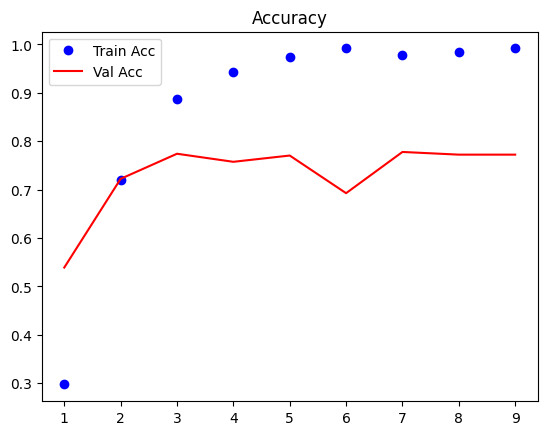

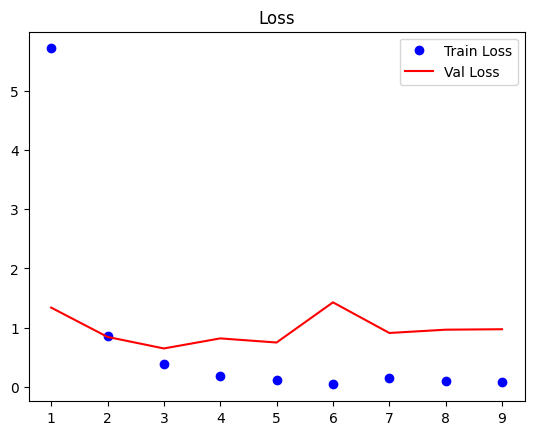

In [79]:
plt.plot(epochs, train_accuracy, 'bo', label='Train Acc')
plt.plot(epochs, val_accuracy, 'r', label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, train_loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()